**🛍Introduction**

Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It is split in 10,000 as test and 50,000 as train datasets. Although the dataset is relatively simple, it can be used as the basis for learning and practicing how to develop, evaluate, and use deep convolutional neural networks for image classification from scratch.



In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import backend as K
!pip install -q -U keras-tuner

import keras_tuner as kt


print('Num GPUs Available: ', len(tf.config.experimental.list_physical_devices('GPU')))

     |████████████████████████████████| 133 kB 5.1 MB/s 
Num GPUs Available:  1


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("Fashion MNIST train -  rows:",x_train.shape," Label Shape Train : ",y_train.shape)
print("Fashion MNIST test -  rows:",x_test.shape," Label Shape Train : ",y_test.shape)

Fashion MNIST train -  rows: (60000, 28, 28)  Label Shape Train :  (60000,)
Fashion MNIST test -  rows: (10000, 28, 28)  Label Shape Train :  (10000,)


#  Visualize the Data using plot Method 

In [6]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    unique, counts = np.unique(data, return_counts=True)
    g = sns.countplot(data, palette='YlGn')
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, unique):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()  
 # Watch every data according to label on training data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


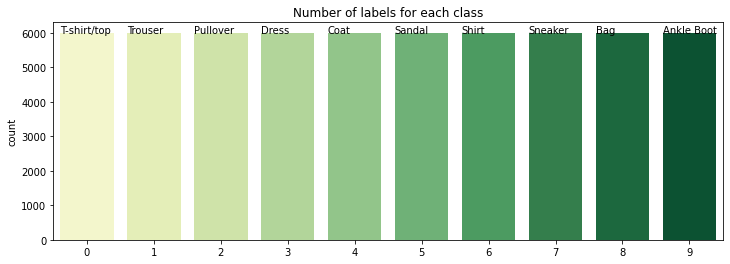

In [7]:
plot_label_per_class(data = y_train) # Call on Training Data

In [ ]:
plot_label_per_class(data = y_test) # Call on Testing Data

# Visualize Some of Images

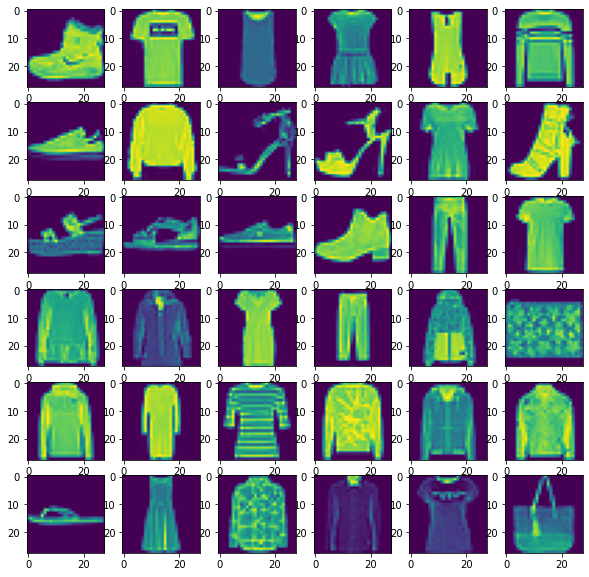

In [8]:
plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(36):
    plt.subplot(6,6,i+1)    # the number of images in the grid is 6*6 (36)
    plt.imshow(x_train[i])

plt.show()

# Preprocessing

# Reshape and Normalize Each Row of Dataset on traning and testing

In [9]:
# data preprocessing
def data_Reshape_Normalize(DataX,DataY):
    DataX = DataX.reshape((DataX.shape[0], 28, 28, 1)) #reshape
    out_x = DataX / 255 # Normlize the data
    return out_x,DataY # retun data

X,Y=data_Reshape_Normalize(x_train,y_train)
X_Test,Y_Test=data_Reshape_Normalize(x_test,y_test)   

# Split Training Data Into Training and Validation

In [10]:
X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size=0.2, random_state=1)

# LeNet-5 Architecture As the Same

In [28]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.build()
model.summary()
adam = Adam(learning_rate=5e-4)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_train)
history =model.fit(datagen.flow(X_train, y_train, batch_size=100), 
                    epochs=30, validation_data=(X_validate, y_validate), callbacks=[reduce_lr,callback])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 5, 5, 48)         0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 1200)              0         
                                                                 
 dense_48 (Dense)            (None, 256)             

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


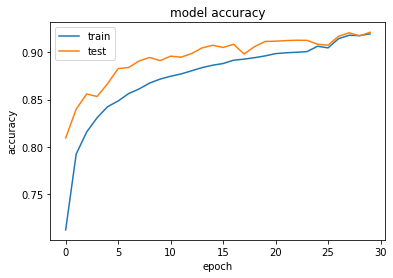

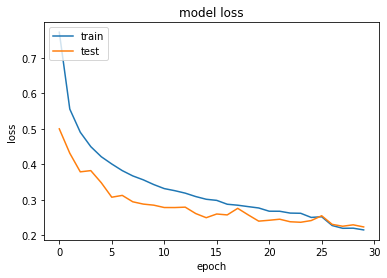

In [29]:
# plot graphs for the native archiecture
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# LeNet-5 Architecture With HyberBand Tunning HyperParamters

In [30]:
'''
here we try to use hyperband method to tunning different hyperparameters 
1- Activation Function 
2- learning rate
3- number of filters
4- padding
5- number of units in each hidden layer
'''
def LeNet(hp):
  #zeyad add some hyperparameters to be optimized
  keras.backend.clear_session()
    

  activation_1 =hp.Choice('activation_1',values=['relu', 'tanh', 'sigmoid'],default='relu') # activation Function For Tunning
  activation_2 =hp.Choice('activation_2',values=['relu', 'tanh', 'sigmoid'],default='relu') # activation Function For Tunning
  activation_3 =hp.Choice('activation_3',values=['relu', 'tanh', 'sigmoid'],default='relu') # activation Function For Tunning
  activation_4 =hp.Choice('activation_4',values=['relu', 'tanh', 'sigmoid'],default='relu') # activation Function For Tunning
  num_of_filters_1 = hp.Choice('filters_1',values=[8, 16, 32,64],default=32) # activation Function For Tunning
  num_of_filters_2 = hp.Choice('filters_2',values=[8, 16, 32,64],default=32) # activation Function For Tunning
  padding_1 = hp.Choice('padding_1',values=['valid','same'],default='same') # activation Function For Tunning
  padding_2 = hp.Choice('padding_2',values=['valid','same'],default='valid') # activation Function For Tunning
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4,1e-6])# tuning the  learning rate 
  hidden_layer_units_1 = hp.Int('hidden_1', min_value=32, max_value=512, step=32)# tuning the  learning rate 
  hidden_layer_units_2 = hp.Int('hidden_2',min_value=32, max_value=512, step=32)# tuning the  learning rate 


  model = Sequential()
  model.add(Conv2D(filters=num_of_filters_1, kernel_size=(5,5), padding=padding_1, activation=activation_1, input_shape=(28, 28, 1)))
  model.add(MaxPooling2D(strides=2))
  model.add(Conv2D(filters=num_of_filters_2, kernel_size=(5,5), padding=padding_2, activation=activation_2))
  model.add(MaxPooling2D(strides=2))
  model.add(Flatten())

  model.add(Dense(hidden_layer_units_1, activation=activation_3))
  model.add(Dense(hidden_layer_units_2, activation=activation_4))

  model.add(Dense(10, activation='softmax'))
  adam = Adam(learning_rate=hp_learning_rate)
  model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

  model.build(X_train.shape)
  print(model.summary())
  return model

In [31]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_train)

In [32]:
tuner = kt.Hyperband(LeNet,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='my_dir1ii6',
                     project_name='intro5i_to_k2t',
                    overwrite=True)

#zeyad edited the monitor value from val_loss to val_accuracy 1:22 AM 3/4/2022
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5) # Early Stopping 
tf.debugging.set_log_device_placement(True)

tuner.search(datagen.flow(X_train, y_train, batch_size=256), epochs=50, validation_data=(X_validate, y_validate), callbacks=[stop_early])

Trial 30 Complete [00h 03m 35s]
val_accuracy: 0.8583333492279053

Best val_accuracy So Far: 0.8889999985694885
Total elapsed time: 00h 45m 38s
INFO:tensorflow:Oracle triggered exit


In [33]:
# Show a summary of the search
tuner.results_summary() 
# watch here all trials

Results summary
Results in my_dir1ii6/intro5i_to_k2t
Showing 10 best trials
Trial summary
Hyperparameters:
activation_1: relu
activation_2: relu
activation_3: tanh
activation_4: tanh
filters_1: 32
filters_2: 64
padding_1: valid
padding_2: valid
learning_rate: 0.001
hidden_1: 64
hidden_2: 128
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.8889999985694885
Trial summary
Hyperparameters:
activation_1: relu
activation_2: relu
activation_3: tanh
activation_4: sigmoid
filters_1: 8
filters_2: 32
padding_1: same
padding_2: same
learning_rate: 0.01
hidden_1: 160
hidden_2: 320
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.8888333439826965
Trial summary
Hyperparameters:
activation_1: relu
activation_2: relu
activation_3: tanh
activation_4: sigmoid
filters_1: 8
filters_2: 32
padding_1: same
padding_2: same
learning_rate: 0.01
hidden_1: 160
hidden_2: 320
tuner/epochs: 7
tuner/initial_epoch

# Best HyperParameters 

In [34]:
# Retrieve the best HyperParameters

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0] #get the best hyperparameters combinations

print("The best Learning Rate : "+str(best_hps.get("learning_rate"))) 
print("The best activation function used for the first convolution layer: "+best_hps.get("activation_1")) 
print("The best activation function used for the second convolution layer: "+best_hps.get("activation_2")) 
print("The best activation function used for the first hidden layer: "+best_hps.get("activation_3")) 
print("The best activation function used for the second hidden layer: "+best_hps.get("activation_4")) 
print(f"The best number of filters used for the first convolution layer: {best_hps.get('filters_1')}") 
print(f"The best number of filters used for the second convolution layer: {best_hps.get('filters_2')}") 
print("The best padding value ('valid','same') used for the first convolution layer: "+best_hps.get("padding_1")) 
print("The best padding value ('valid','same') used for the second convolution layer: "+best_hps.get("padding_2")) 
print(f"The best number of neurons in the first hidden layers: {best_hps.get('hidden_1')}") 
print(f"The best number of neurons in the second hidden layers: {best_hps.get('hidden_2')}")

The best Learning Rate : 0.001
The best activation function used for the first convolution layer: relu
The best activation function used for the second convolution layer: relu
The best activation function used for the first hidden layer: tanh
The best activation function used for the second hidden layer: tanh
The best number of filters used for the first convolution layer: 32
The best number of filters used for the second convolution layer: 64
The best padding value ('valid','same') used for the first convolution layer: valid
The best padding value ('valid','same') used for the second convolution layer: valid
The best number of neurons in the first hidden layers: 64
The best number of neurons in the second hidden layers: 128


# The Optimal Five results of learning rate and Activation Functions using HyperBand 

In [35]:
# Get the optimal 5 hyperparameters after finishing the search
best_hps=tuner.get_best_hyperparameters(num_trials=5)[:]


best_learning_rates = []#will store best learning rates
best_activation_function_1 = [] #will store the best activation function used for the first convolution layer
best_activation_function_2 = [] #will store the best activation function used for the second convolution layer
best_activation_function_3 = [] #will store the best activation function used for the first hidden layer
best_activation_function_4 = [] #will store the best activation function used for the second hidden layer
best_filter_val_1 = [] #will store the best number of filters used for the first convolution layer
best_filter_val_2 = []  #will store the best number of filters used for the second convolution layer
best_padding_val_1 = [] #will store the best padding value ('valid','same') used for the first convolution layer
best_padding_val_2 = [] #will store the best padding value ('valid','same') used for the second convolution layer
best_hidden_units_1 = [] #will store the best number of neurons in the first hidden layers
best_hidden_units_2 = [] #will store the best number of neurons in the second hidden layers

for i in range(5):
  best_learning_rates.append(best_hps[i].get('learning_rate'))
  best_activation_function_1.append(best_hps[i].get('activation_1'))
  best_activation_function_2.append(best_hps[i].get('activation_2'))
  best_activation_function_3.append(best_hps[i].get('activation_3'))
  best_activation_function_4.append(best_hps[i].get('activation_4'))
  best_filter_val_1.append(best_hps[i].get('filters_1'))
  best_filter_val_2.append(best_hps[i].get('filters_2'))
  best_padding_val_1.append(best_hps[i].get('padding_1'))
  best_padding_val_2.append(best_hps[i].get('padding_2'))
  best_hidden_units_1.append(best_hps[i].get('hidden_1'))
  best_hidden_units_2.append(best_hps[i].get('hidden_2'))

print(len(best_padding_val_1))
best_hps = pd.DataFrame({'Learning rate':best_learning_rates, 
                            'best activation function used for first convo layer':best_activation_function_1,
                            'best activation function used for second convo layer':best_activation_function_2,
                             'best activation function used for first hidden layer':best_activation_function_3,
                            'best activation function used for second hidden layer':best_activation_function_4,
                            'best number of filters used for first convo layer':best_filter_val_1,
                            'best number of filters used for second convo layer':best_filter_val_2,
                            'best padding value used for first convo layer':best_padding_val_1,
                            'best padding value used for second convo layer':best_padding_val_2,
                             'best number of neurons used for first hidden layer':best_hidden_units_1,
                            'best number of neurons used for second hidden layer':best_hidden_units_2
                           })

best_hps.style.set_table_attributes("style='display:inline'").set_caption('Best combination of hyperparameter values')
best_hps.style.set_table_attributes("style='display:inline'").set_caption('Best combination of hyperparameter values')
best_hps.drop_duplicates(inplace=True)
best_hps.reset_index(drop=True,inplace=True)
best_hps

5


,Learning rate,best activation function used for first convo layer,best activation function used for second convo layer,best activation function used for first hidden layer,best activation function used for second hidden layer,best number of filters used for first convo layer,best number of filters used for second convo layer,best padding value used for first convo layer,best padding value used for second convo layer,best number of neurons used for first hidden layer,best number of neurons used for second hidden layer
0,0.001,relu,relu,tanh,tanh,32,64,valid,valid,64,128
1,0.010,relu,relu,tanh,sigmoid,8,32,same,same,160,320
2,0.010,tanh,tanh,tanh,relu,8,8,same,valid,224,160
3,0.010,relu,tanh,sigmoid,sigmoid,8,8,valid,same,224,128


# Train the model using the best five hyper Parameters to get Accuracy and loss on training and validate

We got the first five Highest models by trying Different Tunning Parameters Using HyperBand search to get them using LeNet-5 architecture and no overfitting happen

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                6

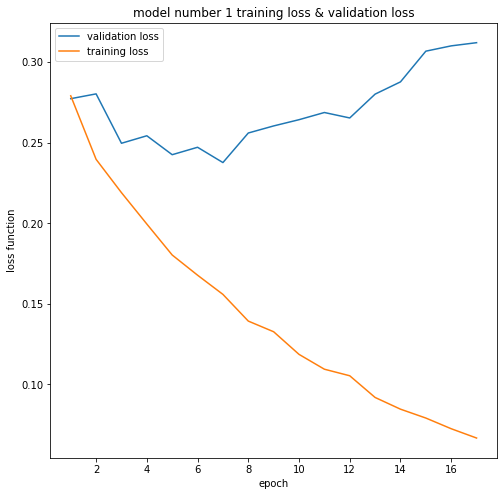

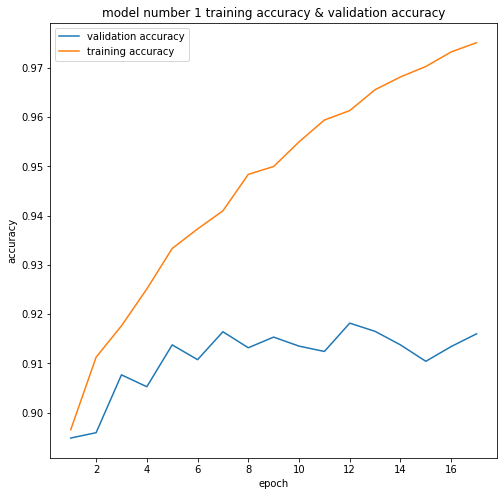

Epoch 1/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3383 - accuracy: 0.8731 - val_loss: 0.3411 - val_accuracy: 0.8699
Epoch 2/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3283 - accuracy: 0.8776 - val_loss: 0.3330 - val_accuracy: 0.8726
Epoch 3/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3283 - accuracy: 0.8780 - val_loss: 0.3509 - val_accuracy: 0.8674
Epoch 4/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3463 - accuracy: 0.8726 - val_loss: 0.3634 - val_accuracy: 0.8669
Epoch 5/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3654 - accuracy: 0.8648 - val_loss: 0.3692 - val_accuracy: 0.8647
Epoch 6/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3674 - accuracy: 0.8618 - val_loss: 0.3582 - val_accuracy: 0.8658
Epoch 7/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3604 - accuracy: 0.8649 - val_loss: 0.3646 - val_accuracy: 0.8633


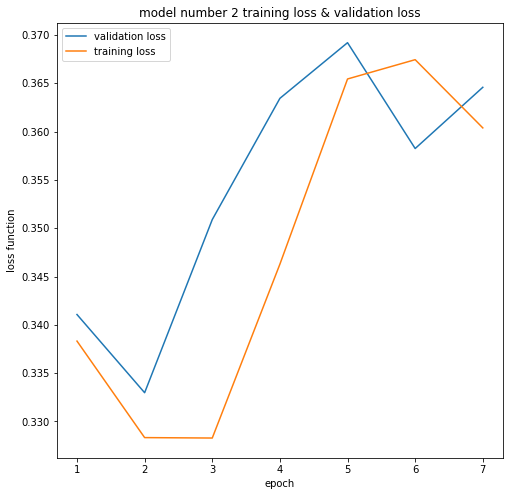

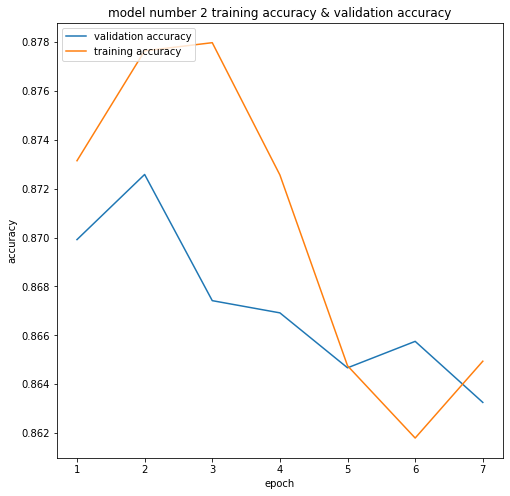

Epoch 1/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3518 - accuracy: 0.8701 - val_loss: 0.3286 - val_accuracy: 0.8782
Epoch 2/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3202 - accuracy: 0.8801 - val_loss: 0.3181 - val_accuracy: 0.8834
Epoch 3/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3223 - accuracy: 0.8784 - val_loss: 0.3446 - val_accuracy: 0.8745
Epoch 4/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3090 - accuracy: 0.8852 - val_loss: 0.3357 - val_accuracy: 0.8763
Epoch 5/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3188 - accuracy: 0.8824 - val_loss: 0.3304 - val_accuracy: 0.8752
Epoch 6/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3260 - accuracy: 0.8781 - val_loss: 0.3497 - val_accuracy: 0.8725
Epoch 7/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3631 - accuracy: 0.8644 - val_loss: 0.3954 - val_accuracy: 0.8513


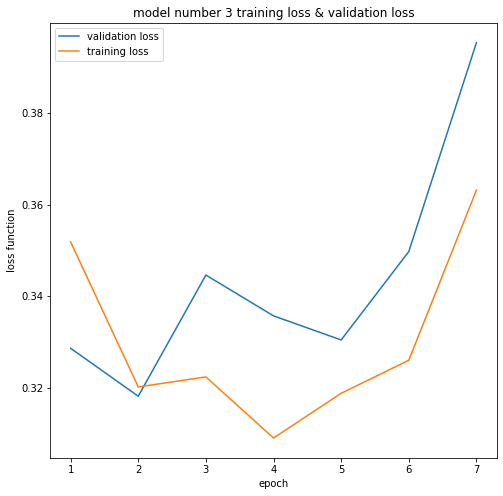

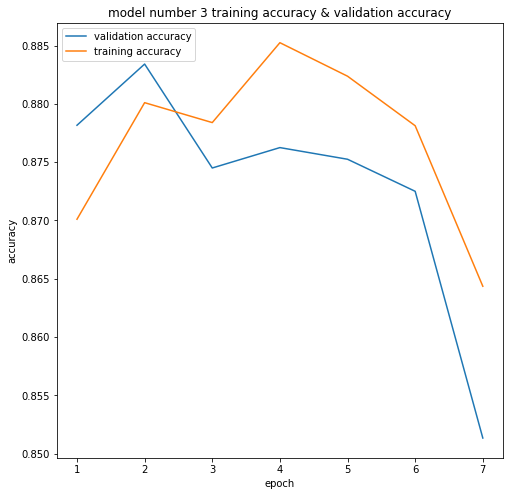

Epoch 1/20
480/480 [==============================] - 2s 4ms/step - loss: 0.4218 - accuracy: 0.8465 - val_loss: 0.3901 - val_accuracy: 0.8572
Epoch 2/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3798 - accuracy: 0.8632 - val_loss: 0.3921 - val_accuracy: 0.8618
Epoch 3/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3572 - accuracy: 0.8704 - val_loss: 0.3828 - val_accuracy: 0.8637
Epoch 4/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3475 - accuracy: 0.8739 - val_loss: 0.4155 - val_accuracy: 0.8510
Epoch 5/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3486 - accuracy: 0.8732 - val_loss: 0.3839 - val_accuracy: 0.8552
Epoch 6/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3490 - accuracy: 0.8716 - val_loss: 0.3749 - val_accuracy: 0.8678
Epoch 7/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3429 - accuracy: 0.8746 - val_loss: 0.3414 - val_accuracy: 0.8766
Epoch 

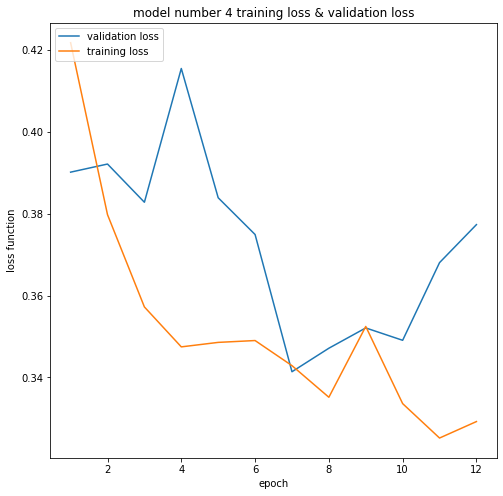

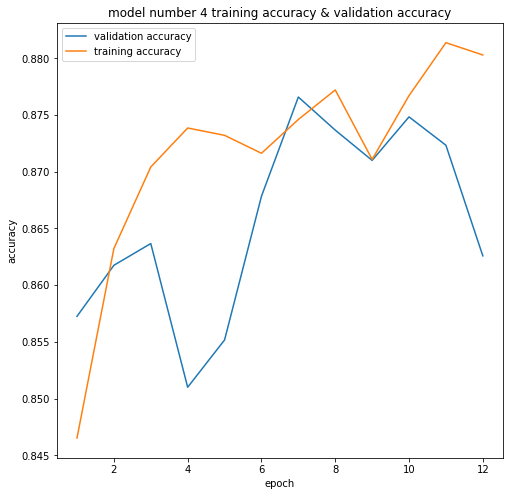

Epoch 1/20
480/480 [==============================] - 3s 4ms/step - loss: 0.3476 - accuracy: 0.8701 - val_loss: 0.3598 - val_accuracy: 0.8684
Epoch 2/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3214 - accuracy: 0.8804 - val_loss: 0.3222 - val_accuracy: 0.8772
Epoch 3/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3074 - accuracy: 0.8837 - val_loss: 0.3325 - val_accuracy: 0.8725
Epoch 4/20
480/480 [==============================] - 2s 4ms/step - loss: 0.2970 - accuracy: 0.8899 - val_loss: 0.3307 - val_accuracy: 0.8774
Epoch 5/20
480/480 [==============================] - 2s 4ms/step - loss: 0.2890 - accuracy: 0.8929 - val_loss: 0.3461 - val_accuracy: 0.8721
Epoch 6/20
480/480 [==============================] - 2s 4ms/step - loss: 0.2860 - accuracy: 0.8925 - val_loss: 0.3289 - val_accuracy: 0.8796
Epoch 7/20
480/480 [==============================] - 2s 4ms/step - loss: 0.2817 - accuracy: 0.8958 - val_loss: 0.3037 - val_accuracy: 0.8898
Epoch 

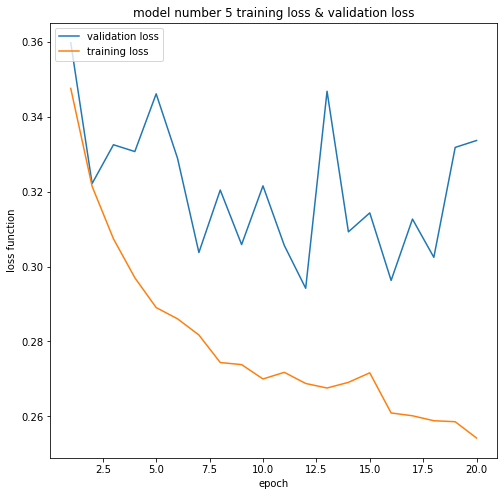

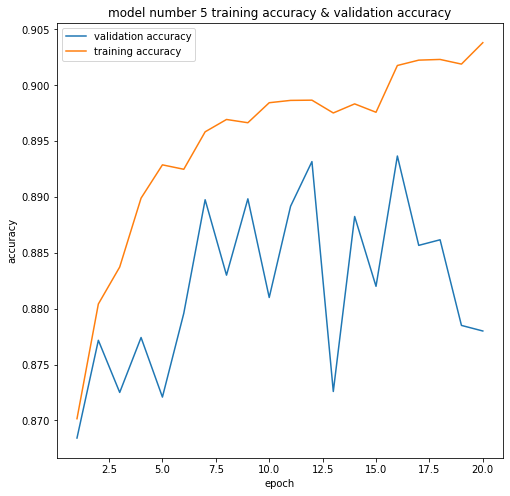

***************************************Model******************************

Here we have 2 graph for each trial:- 

one for training 
one for validation 
for each one 
one for ->>>>> loss training and loss validation
one for ->>>>> Accuracy Training and Accuracy Validation



In [36]:

list_OF_Val_Loss=[]
list_OF_Loss=[]
list_Val_accuracy=[]
list_accuracy=[]

best_model = tuner.get_best_models(num_models=5)[:]
for i in range (5):
  best_model[i].build(x_train.shape)
  history=best_model[i].fit(
    X_train, 
    y_train,
    validation_data=(X_validate, y_validate),
    callbacks=[stop_early],
    batch_size=100,
    epochs=20,)
    #
  val_loss_per_epoch = history.history['val_loss']
  loss_per_epoch = history.history['loss']
  val_accuracy_per_epoch = history.history['val_accuracy']
  accuracy_per_epoch = history.history['accuracy']
  #
  list_OF_Val_Loss.append(val_loss_per_epoch)
  list_OF_Loss.append(loss_per_epoch)
  list_Val_accuracy.append(val_accuracy_per_epoch)
  list_accuracy.append(accuracy_per_epoch)

  #
  plt.figure(figsize=(8,8))
  plt.title(f"model number {i+1} training loss & validation loss")
  plt.xlabel('epoch')
  plt.ylabel('loss function')
  plt.plot(np.arange(1,len(val_loss_per_epoch)+1),val_loss_per_epoch,label="validation loss")
  plt.plot(np.arange(1,len(loss_per_epoch)+1),loss_per_epoch,label = "training loss")
  plt.legend(loc="upper left")
  plt.show()
  #######################
  plt.figure(figsize=(8,8))
  plt.title(f"model number {i+1} training accuracy & validation accuracy")
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(np.arange(1,len(val_accuracy_per_epoch)+1),val_accuracy_per_epoch,label="validation accuracy")
  plt.plot(np.arange(1,len(accuracy_per_epoch)+1),accuracy_per_epoch,label = "training accuracy")
  plt.legend(loc="upper left")
  plt.show()

print("***************************************Model******************************")
print("""
Here we have 2 graph for each trial:- 

one for training 
one for validation 
for each one 
one for ->>>>> loss training and loss validation
one for ->>>>> Accuracy Training and Accuracy Validation
""")

# Plot graph using the first fifth models for compare Accuracy and loss

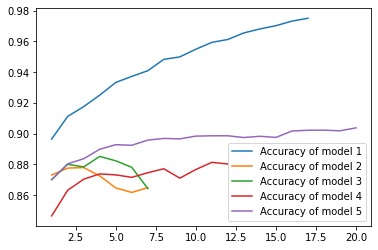

In [37]:
# here we plot the first fifth models for compare Accuracy

for i in range (5):
  plt.plot(np.arange(1,len(list_accuracy[i])+1), list_accuracy[i], label = "Accuracy of model "+str(i+1))

plt.legend()
plt.show()

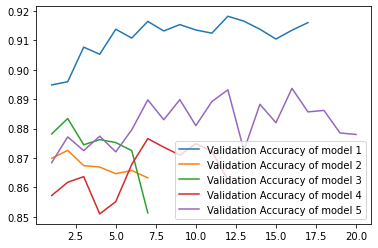

In [38]:
# here we plot the first fifth models for compare Validation Accuracy
for i in range (5):
  plt.plot(np.arange(1,len(list_Val_accuracy[i])+1), list_Val_accuracy[i], label = "Validation Accuracy of model "+str(i+1))
plt.legend()
plt.show()

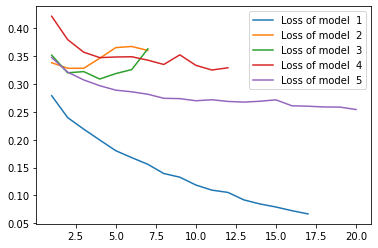

In [39]:
# here we plot the first fifth models for compare loss Training 

for i in range (5):
  plt.plot(np.arange(1,len(list_OF_Loss[i])+1), list_OF_Loss[i], label = "Loss of model  "+str(i+1))

plt.legend()
plt.show()

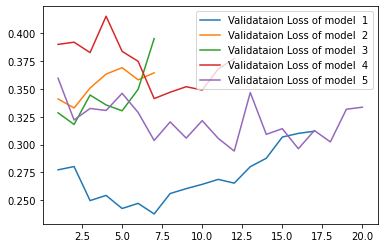

In [40]:
# here we plot the first fifth models for compare loss Training 

for i in range (5):
  plt.plot(np.arange(1,len(list_OF_Val_Loss[i])+1), list_OF_Val_Loss[i], label = "Validataion Loss of model  "+str(i+1))

plt.legend()
plt.show()

In [41]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(datagen.flow(X_train, y_train, batch_size=100), epochs=50, validation_data=(X_validate, y_validate), callbacks=[stop_early])

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best number of epochs used to train this data: %d' % (best_epoch,))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                6

## Let's Evaluate The model with highest HyberParamters Using Test Data 

In [42]:
# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model.
loss, accuracy = best_model.evaluate(X_Test, Y_Test)
print("Accuracy of Testing : ",accuracy)
print("Loss Of Testing : ",loss)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                6

# Here we started use k-fold Cross validation

In [43]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def create_baseline():
    adam = Adam(learning_rate=5e-4)
    # create model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPooling2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = create_baseline()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        tf.debugging.set_log_device_placement(True)
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=1)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [44]:
s,h=evaluate_model(X,Y)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4655 - accuracy: 0.8308 - val_loss: 0.3178 - val_accuracy: 0.8837
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2978 - accuracy: 0.8906 - val_loss: 0.3180 - val_accuracy: 0.8865
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2528 - accuracy: 0.9062 - val_loss: 0.2600 - val_accuracy: 0.9037
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2209 - accuracy: 0.9184 - val_loss: 0.2536 - val_accuracy: 0.9072
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1965 - accuracy: 0.9262 - val_loss: 0.2591 - val_accuracy: 0.9051
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1731 - accuracy: 0.9347 - val_loss: 0.2615 - val_accuracy: 0.9110
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1541 - accuracy: 0.9405 - val_loss: 0.2434 - val_accuracy:

In [45]:
s

[0.9066666960716248,
 0.9190833568572998,
 0.9190000295639038,
 0.9066666960716248,
 0.9121666550636292]

# Here We plot Graphes for k-Fold Cross Validation

In [46]:
from numpy import mean
from numpy import std
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='validate')
    plt.legend(["Train", "Validate"], loc ="lower right")    
    plt.show() # for losses 
     
    for i in range(len(histories)):

       # plot accuracy
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='validate') 
    plt.legend(["Train", "Validate"], loc ="lower right")    
    plt.show() # For Accuracy


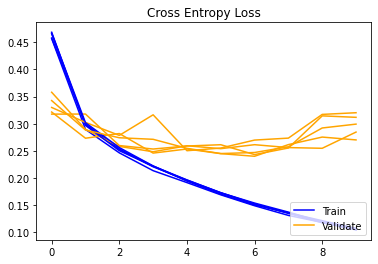

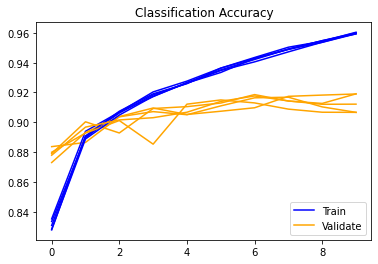

In [47]:
# learning curves
summarize_diagnostics(h)


# Transfer learning 
Resnet 50 with fashion mnist

We need to resize the MNIST data set. Note that minimum size actually depends on the ImageNet model. For example: Xception requires at least 72, where ResNet is asking for 32. Apart from that, the MNIST is a grayscale image, but it may conflict if you're using the pretrained weight of these models. So, good and safe side is to resize and convert grayscale to RGB.

We will resize MNIST from 28 to 32. Also, make 3 channels instead of keeping 1.

# Resnet Trials 

In [48]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print ("Before Expanding Dim : ")
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# expand new axis, channel axis 
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# it's always better to normalize 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
x_train = tf.image.resize(x_train, [32,32]) # if we want to resize 
x_test = tf.image.resize(x_test, [32,32]) # if we want to resize 

print ("After Expanding Dim : ")
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Before Expanding Dim : 
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
After Expanding Dim : 
(60000, 32, 32, 3) (60000,)
(10000, 32, 32, 3) (10000,)


In [49]:
def resnet_pseudo(freezee):
		model = tf.keras.applications.ResNet50(weights='imagenet',include_top=False)
		x = model.output
		x = tf.keras.layers.GlobalAveragePooling2D()(x)
		x = Dense(512, activation='relu')(x)
		x = Dropout(0.5)(x)
		x = Dense(512, activation='relu')(x)
		x = Dropout(0.5)(x)
		out = Dense(10,activation='softmax')(x)
		model_final = tf.keras.Model( model.input,outputs=out)
		
		for layer in model.layers:
				layer.trainable = freezee
		return model_final

	# VGG16 Model for transfer Learning 

**First Trial ResNet 50 With Freezee layers**

In [50]:
RESN_model=resnet_pseudo(False)
RESN_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                             

In [51]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
RESN_model.compile(
          loss  = "sparse_categorical_crossentropy",
      metrics=['accuracy'],
          optimizer = tf.keras.optimizers.Adam())
# fit
tf.debugging.set_log_device_placement(True)
history=RESN_model.fit(x_train, y_train,validation_split=0.2, batch_size=128, epochs=20, verbose = 1, callbacks=[callback])

Epoch 1/20
375/375 [==============================] - 18s 37ms/step - loss: 1.3071 - accuracy: 0.4958 - val_loss: 0.8486 - val_accuracy: 0.6938
Epoch 2/20
375/375 [==============================] - 11s 28ms/step - loss: 0.9981 - accuracy: 0.6182 - val_loss: 0.8563 - val_accuracy: 0.6683
Epoch 3/20
375/375 [==============================] - 8s 22ms/step - loss: 0.9887 - accuracy: 0.6170 - val_loss: 0.7577 - val_accuracy: 0.7249
Epoch 4/20
375/375 [==============================] - 8s 21ms/step - loss: 0.9479 - accuracy: 0.6319 - val_loss: 0.7695 - val_accuracy: 0.7168
Epoch 5/20
375/375 [==============================] - 8s 22ms/step - loss: 0.9349 - accuracy: 0.6351 - val_loss: 0.7587 - val_accuracy: 0.7243
Epoch 6/20
375/375 [==============================] - 8s 22ms/step - loss: 0.9200 - accuracy: 0.6414 - val_loss: 0.7060 - val_accuracy: 0.7349
Epoch 7/20
375/375 [==============================] - 8s 22ms/step - loss: 0.8968 - accuracy: 0.6513 - val_loss: 0.7294 - val_accuracy: 0.72

In [52]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = RESN_model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 2s 22ms/step - loss: 0.7489 - accuracy: 0.7331
test loss, test acc: [0.7488641142845154, 0.7330999970436096]


### **Plotting**

Text(0, 0.5, 'Losses')

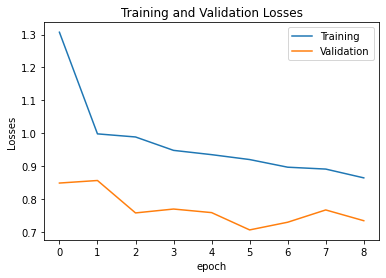

In [53]:
history.history.keys()
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'accuracy')

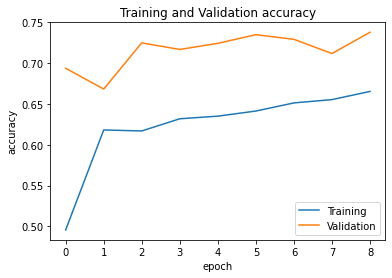

In [54]:
history.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

There is an **`Generalization`** because of Validation larger than Train

**Second Trial ResNet 50 Without Freezee layers**

In [ ]:
RESN_model=resnet_pseudo(True)
RESN_model.summary()

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
RESN_model.compile(
          loss  = "sparse_categorical_crossentropy",
      metrics=['accuracy'],
          optimizer = tf.keras.optimizers.Adam())
# fit
tf.debugging.set_log_device_placement(True)
history=RESN_model.fit(x_train, y_train,validation_split=0.2, batch_size=128, epochs=20, verbose = 1, callbacks=[callback])

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = RESN_model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

### **Plotting**

In [ ]:
history.history.keys()
%matplotlib inline
plt.plot(np.arange(len(history.history['loss'])),history.history['loss'])
plt.plot(np.arange(len(history.history['loss'])),history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')

In [ ]:
history.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

# From two trials we found :-
- 1 st Trial faster and little parameterts to learn .
- 1 st Trial , there is generalization and no overfitting case happen according to loss and accuracy 
---------------------------------------------------------------------------------------------------

- 2 nd Trial , take more time and more and more parameters to learn according to summary
- 2 nd no overfitting happen but model learning not stable becuase number of parameters very big

-----------------------------------------------
# the best trial the first one with freeze all layers 




# Inception v3 

In [5]:
import tensorflow as tf 
import numpy as np 



((x_train, y_train), (x_test, y_test)) = tf.keras.datasets.fashion_mnist.load_data()

# expand new axis, channel axis 
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# it's always better to normalize 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

img_dims= 75

# resize the input shape , i.e. old shape: 28, new shape: 75
x_train = tf.image.resize(x_train, [img_dims,img_dims]) # if we want to resize
x_test = tf.image.resize(x_test, [img_dims,img_dims]) # if we want to resize 


# one hot 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 75, 75, 3) (60000, 10)
(10000, 75, 75, 3) (10000, 10)


**First Trial InceptionV3 Without  Freezee layers**

In [58]:
from keras import backend as K 

# Do some code, e.g. train and save model

K.clear_session()
# inputs = tf.keras.Input(batch_shape=(img_dims,img_dims, 3))

from keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(weights='imagenet',include_top=False,input_shape=(img_dims, img_dims, 3))

from keras.layers import GlobalAveragePooling2D

x = base_model.output
x = tf.keras.layers.Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
output = tf.keras.layers.Dense(10,activation = 'softmax')(x)

# bind all
Incept_model = tf.keras.Model(base_model.input, output)
Incept_model.summary()

87924736/87910968 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)     

In [59]:
Incept_model.compile(
          loss  = tf.keras.losses.CategoricalCrossentropy(),
          metrics = tf.keras.metrics.CategoricalAccuracy(),
          optimizer = tf.keras.optimizers.Adam())
# fit 
print("Fit model on training data")
tf.debugging.set_log_device_placement(True)
history = Incept_model.fit(x_train, y_train,validation_split=0.2, batch_size=128, epochs=10, verbose = 1)

Fit model on training data
Epoch 1/10
375/375 [==============================] - 58s 128ms/step - loss: 0.4137 - categorical_accuracy: 0.8606 - val_loss: 0.3823 - val_categorical_accuracy: 0.8727
Epoch 2/10
375/375 [==============================] - 45s 121ms/step - loss: 0.2269 - categorical_accuracy: 0.9235 - val_loss: 0.2548 - val_categorical_accuracy: 0.9128
Epoch 3/10
375/375 [==============================] - 44s 117ms/step - loss: 0.1867 - categorical_accuracy: 0.9352 - val_loss: 0.2324 - val_categorical_accuracy: 0.9212
Epoch 4/10
375/375 [==============================] - 46s 122ms/step - loss: 0.1661 - categorical_accuracy: 0.9427 - val_loss: 0.2756 - val_categorical_accuracy: 0.8984
Epoch 5/10
375/375 [==============================] - 46s 122ms/step - loss: 0.1454 - categorical_accuracy: 0.9489 - val_loss: 0.2307 - val_categorical_accuracy: 0.9258
Epoch 6/10
375/375 [==============================] - 44s 117ms/step - loss: 0.1313 - categorical_accuracy: 0.9544 - val_loss: 0

In [60]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = Incept_model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 3s 42ms/step - loss: 0.2681 - categorical_accuracy: 0.9233
test loss, test acc: [0.2681446671485901, 0.92330002784729]


### **Plotting**

Text(0, 0.5, 'Losses')

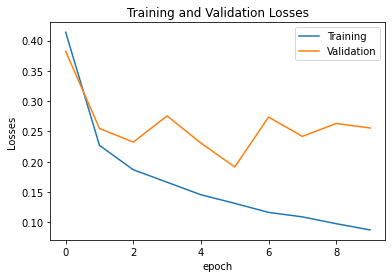

In [61]:
history.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'accuracy')

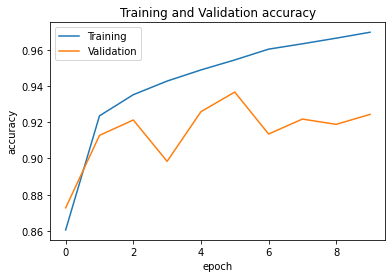

In [62]:
history.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

There is an **`no overfitting`** this trail without freezee any layers and the gap between training and validation little bit small according to losses and accuracies and the Inception module the best than resnet-50 module 

**Second Trial InceptionV3 With Freezee layers**

In [6]:
from keras import backend as K 

# Do some code, e.g. train and save model

K.clear_session()
# inputs = tf.keras.Input(batch_shape=(img_dims,img_dims, 3))

from keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(weights='imagenet',include_top=False,input_shape=(img_dims, img_dims, 3))

from keras.layers import GlobalAveragePooling2D

x = base_model.output
x = tf.keras.layers.Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
output = tf.keras.layers.Dense(10,activation = 'softmax')(x)
for layer in base_model.layers:
    layer.trainable = False
# bind all
Incept_model = tf.keras.Model(base_model.input, output)
Incept_model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)     

In [7]:
Incept_model.compile(
          loss  = tf.keras.losses.CategoricalCrossentropy(),
          metrics = tf.keras.metrics.CategoricalAccuracy(),
          optimizer = tf.keras.optimizers.Adam())
# fit 
print("Fit model on training data")
tf.debugging.set_log_device_placement(True)
history = Incept_model.fit(x_train, y_train,validation_split=0.2, batch_size=128, epochs=10, verbose = 1)

Fit model on training data
Epoch 1/10
375/375 [==============================] - 35s 52ms/step - loss: 0.7179 - categorical_accuracy: 0.7540 - val_loss: 0.4865 - val_categorical_accuracy: 0.8245
Epoch 2/10
375/375 [==============================] - 18s 47ms/step - loss: 0.5514 - categorical_accuracy: 0.8005 - val_loss: 0.4589 - val_categorical_accuracy: 0.8331
Epoch 3/10
375/375 [==============================] - 16s 42ms/step - loss: 0.5174 - categorical_accuracy: 0.8125 - val_loss: 0.4390 - val_categorical_accuracy: 0.8418
Epoch 4/10
375/375 [==============================] - 18s 48ms/step - loss: 0.4933 - categorical_accuracy: 0.8212 - val_loss: 0.4241 - val_categorical_accuracy: 0.8450
Epoch 5/10
375/375 [==============================] - 18s 48ms/step - loss: 0.4731 - categorical_accuracy: 0.8275 - val_loss: 0.4152 - val_categorical_accuracy: 0.8482
Epoch 6/10
375/375 [==============================] - 16s 43ms/step - loss: 0.4621 - categorical_accuracy: 0.8312 - val_loss: 0.4165 

In [8]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = Incept_model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 4s 46ms/step - loss: 0.4095 - categorical_accuracy: 0.8498
test loss, test acc: [0.4094764292240143, 0.8497999906539917]


### **Plotting**

Text(0, 0.5, 'Losses')

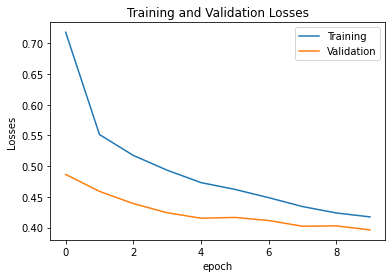

In [9]:
history.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'accuracy')

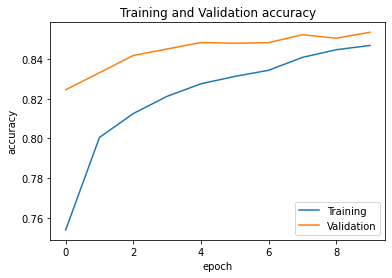

In [10]:
history.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

- 1 st Trial faster and little parameterts to learn .
- 1 st Trial , there is generalization and no overfitting case happen according to loss and accuracy 

# From two trials we found :-
- second Trial faster and little parameterts to learn .
- second Trial , there is generalization and no overfitting case happen according to loss and accuracy 
---------------------------------------------------------------------------------------------------

- First Trial , take more time and more and more parameters to learn according to summary
- First Trial no overfitting happen but model learning not stable becuase number of parameters very big

-----------------------------------------------
# the best trial the second one with freeze all layers 




From Transfer Learning modules we found the best module is Inception module the best one and the freezee the layer is best for saveing more time and generlization 